In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [7]:

# --- PART 1: Preprocessing ---
# Load dataset (ensure 'diabetes.csv' is in your directory)


df = pd.read_csv('diabetes.csv')
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2) Replace 0 with NaN (so Imputer recognizes them)
df[features] = df[features].replace(0, np.nan)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 3) Split the dataset FIRST (Step 4 in prompt, but moved up for correctness)
#    This ensures test data does not influence training imputation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4) Impute Missing Values (Step 3 in prompt)
#    Fit on TRAIN only, then transform both Train and Test
imputer = SimpleImputer(strategy='mean')
X_train[features] = imputer.fit_transform(X_train[features])
X_test[features] = imputer.transform(X_test[features])

# 5) Apply Feature Scaling
#    Similarly, fit scaler only on TRAIN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear SVM Accuracy: 0.7402597402597403


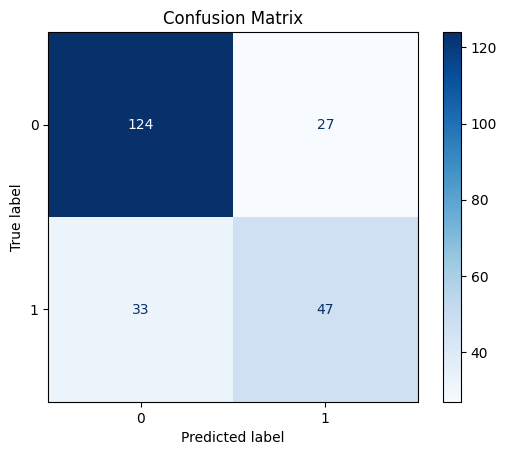

In [143]:
# --- PART 2: Linear SVM ---
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
cm = confusion_matrix(y_test, y_pred_linear)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Linear SVM without scaling Accuracy: 0.7359307359307359


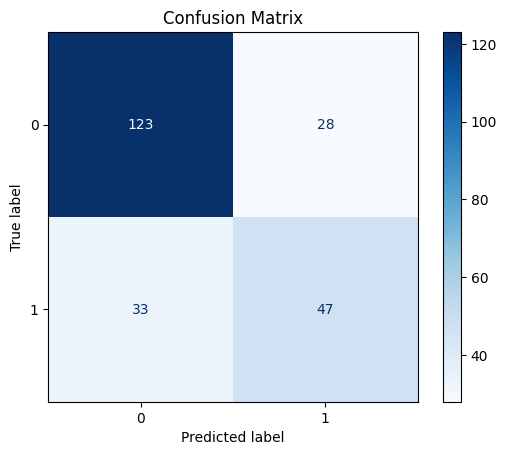

In [141]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear_no_scaling = linear_svm.predict(X_test)
print("Linear SVM without scaling Accuracy:", accuracy_score(y_test, y_pred_linear_no_scaling))
cm = confusion_matrix(y_test, y_pred_linear_no_scaling)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [85]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)
print("\nKernel: linear")
print(classification_report(y_test, y_pred_linear))

rbf_svm = SVC(kernel='rbf', C=8, gamma=0.004)
rbf_svm.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svm.predict(X_test_scaled)
print("\nKernel: rbf")
print(classification_report(y_test, y_pred_rbf))

poly_svm = SVC(kernel='poly', C=1, gamma=0.1)
poly_svm.fit(X_train_scaled, y_train)
y_pred_poly = poly_svm.predict(X_test_scaled)
print("\nKernel: poly")
print(classification_report(y_test, y_pred_poly))


Kernel: linear
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


Kernel: rbf
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231


Kernel: poly
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       151
           1       0.70      0.38      0.49        80

    accuracy                           0.73       231
   macro avg       0.72      0.64      0.65       231
weighted avg       0.72      0.

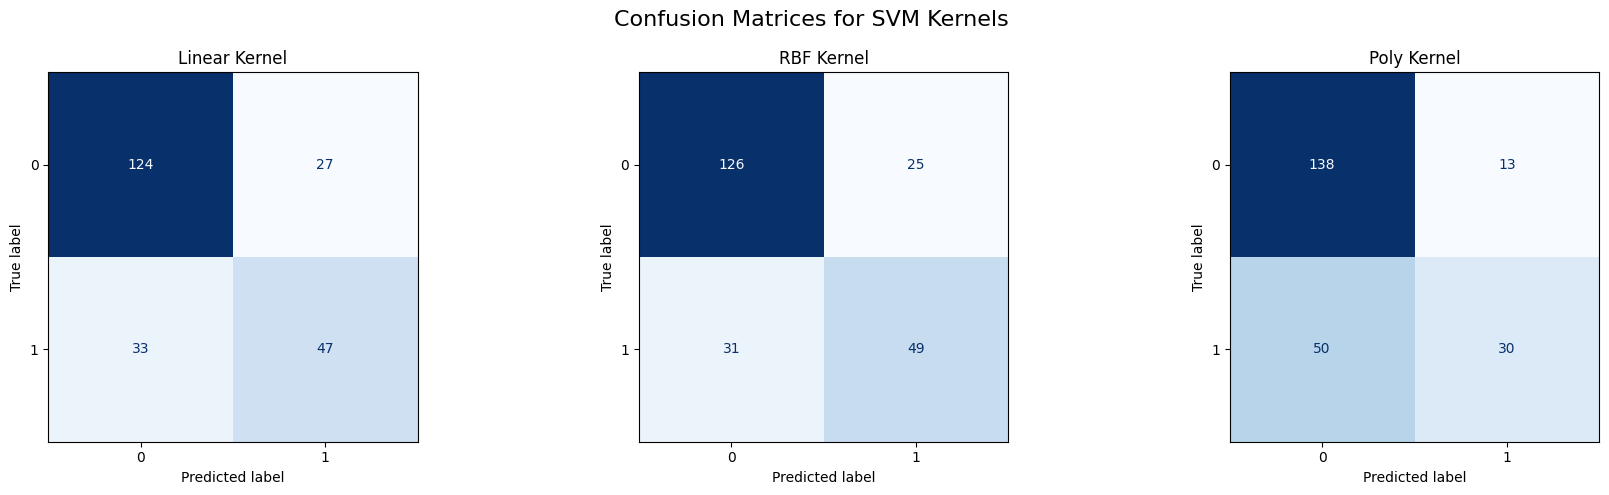

In [145]:
classifiers = {
    'Linear': SVC(kernel='linear'),
    'RBF': SVC(kernel='rbf', C=8, gamma=0.004),
    'Poly': SVC(kernel='poly', C=1, gamma=0.1)
}

# 2. Setup Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 3. Loop through classifiers to train and plot
for i, (name, clf) in enumerate(classifiers.items()):
    # Fit
    clf.fit(X_train_scaled, y_train)
    
    # Plot Confusion Matrix
    # .from_estimator() handles prediction and labels automatically
    ConfusionMatrixDisplay.from_estimator(
        clf, 
        X_test_scaled, 
        y_test, 
        display_labels=clf.classes_, # Uses actual class labels [0, 1]
        cmap=plt.cm.Blues,
        ax=axes[i],
        colorbar=False
    )
    axes[i].set_title(f'{name} Kernel')

plt.suptitle('Confusion Matrices for SVM Kernels', fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
# --- PART 4: Hyperparameter Tuning (RBF) ---
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f"\nBest Params: {grid.best_params_}, Best Score: {grid.best_score_}")


Best Params: {'C': 10, 'gamma': 0.001}, Best Score: 0.77466251298027


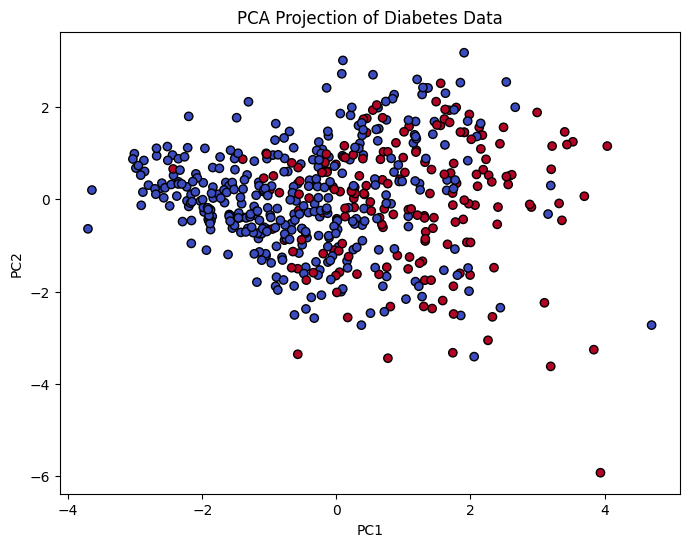

In [9]:
# --- PART 5: PCA Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("PCA Projection of Diabetes Data")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

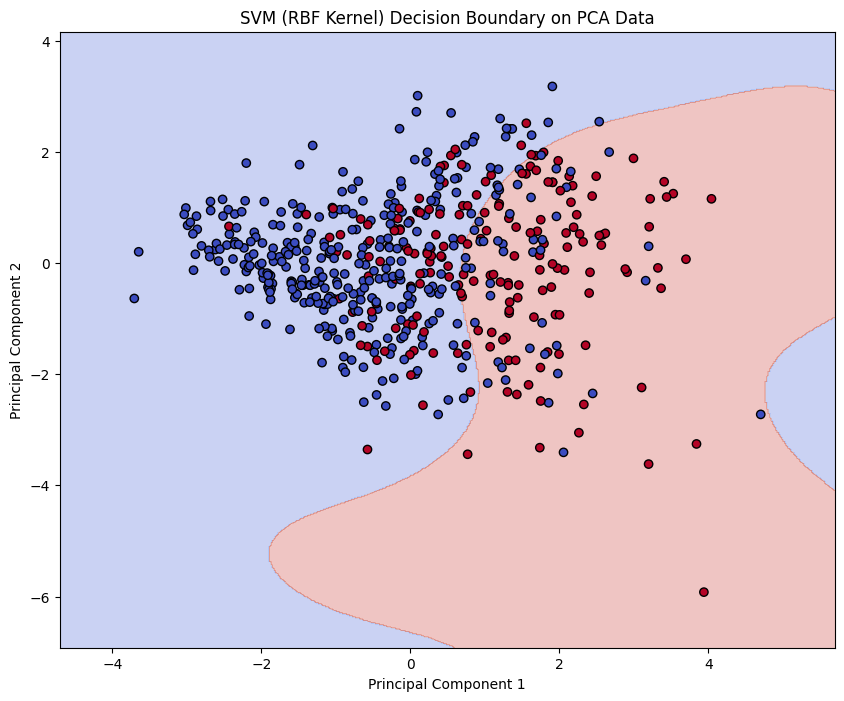

Accuracy on PCA-Reduced Data (2D): 0.7100


In [156]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# 2. Train SVM on the 2D data
svm_pca = SVC(kernel='rbf')
svm_pca.fit(X_train_pca, y_train)

# 3. Visualize the Decision Boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contours and data points
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')

plt.title("SVM (RBF Kernel) Decision Boundary on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

X_test_pca = pca.transform(X_test_scaled)

# 2. Make predictions using the trained PCA-SVM model
y_pred_pca = svm_pca.predict(X_test_pca)

# 3. Calculate Accuracy
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA-Reduced Data (2D): {acc_pca:.4f}")

In [135]:
# --- PART 6: Class Imbalance ---
print("\nClass Counts:\n", y.value_counts())
balanced_svm = SVC(kernel='rbf', class_weight='balanced')
balanced_svm.fit(X_train_scaled, y_train)
print("\nBalanced SVM Report:")
print(classification_report(y_test, balanced_svm.predict(X_test_scaled)))


Class Counts:
 Outcome
0    500
1    268
Name: count, dtype: int64

Balanced SVM Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       151
           1       0.58      0.78      0.66        80

    accuracy                           0.73       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.73      0.73       231

